## RED WINE QUALITY DATA PREPROCESSING 🍷
Bu notebookta veri ön işleme (data preprocessing) yaparak aykırı gözlem ve eksik veri gibi makine öğrenmesi modelimizin performansını kötü yönde etkileyebilecek olan sorunları çözmeye çalışacağız. Amacımız veri setini dengeli bir hale getirip makine öğrenmesi modellerinin daha yüksek başarım vermesini sağlamaktır.

In [1]:
# gerekli kütüphaneler
import numpy as np  # sayısal işlemler 
import pandas as pd  # veri manipülasyonu 
import seaborn as sns  # görselleştirme
import matplotlib.pyplot as plt  # görselleştirme

# görsel çıktılardaki uyarı mesajları için
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# verinin wine değişkenine yüklenmesi
wine = pd.read_csv('winequality-red.csv')

In [3]:
df = wine.copy() 

In [4]:
def kalite_degeri(deger):
    deger = str(deger) 
    if deger == '3':
        deger = deger.replace('3','zayif')
        return deger
    elif deger == '4':
        deger = deger.replace('4','zayif')
        return deger
    elif deger == '5':
        deger = deger.replace('5','orta')
        return deger
    elif deger == '6':
        deger = deger.replace('6','orta')
        return deger
    elif deger == '7':
        deger = deger.replace('7','yuksek')
        return deger
    elif deger == '8':
        deger = deger.replace('8','yuksek')
        return deger
    
df['quality']=df['quality'].apply(kalite_degeri)

Hedef değişkenimizin sınıf sayısını azaltıyoruz. Bunu yapmamızdaki amaç hem sınıf dengesizliği sorununa bir çözüm getirmek hem de modelin daha az sayıda ve daha genel kategorilerle çalışmasını sağlayarak, modelin genelleme yeteneğini artırırken overfitting riskini de azaltmak olacaktır.

## Veri Temizleme (Data Cleaning)
+ Gürültülü Veri (Noisy Data) $\to$ yanlış/bozuk veriler
+ Eksik Veri Analizi (Missing Data Analysis) 
+ Aykırı Değer Analizi (Outlier Analysis)

### Aykırı Değer Analizi
Aykırı gözlem, veride normalin önemli ölçüde dışında olan nadir noktalara denir. 

Aykırı gözlemler, 
+ Verilerin dağılımını ve betimsel istatistiklerini etkilerler.
+ Makine öğrenmesi modellerinin sonuçlarına olumsuz yönde etki edebilirler.
+ İstatistiksel testlerin gücünü azaltabilirler.

Aykırı gözlem, veri ön işleme basamağındaki en kritik öneme sahip problemdir.

*Genellenebilirlik kaygısı ile oluşturulan kural setlerini ya da fonksiyonlarını yanıltır. Yanlılığa sebep olur.*

#### Neden Oluşurlar?
Aşağıdaki hatalardan dolayı veride aykırı gözlemler oluşabilir.
+ Veri girişi hataları
+ Ölçüm hataları
+ Veri işleme hataları
+ Örnekleme hataları

Bunların dışında verideki aykırı gözlem gerçekten de aykırı bir gözlem olabilir. Yani doğal olarak aykırı olması durumu. Mesela uygun fiyatlı Japon arabalarından oluşan bir verinin içerisinde Lamborghini marka araçlarında bulunması gibi, doğal olarak bu değerler verinin çoğunluğunu oluşturan uygun fiyatlı arabalardan farklılaşıcaklardır.

#### Aykırı Gözlem Tespiti
Aykırı gözlemler tek değişkenli (univariate) ve çok değişkenli (multivariate) olarak iki tiptedir. Bu çalışmada tek bir değişkenin dağılıma bakarak gözlemleyebileceğimiz univariate tipindeki aykırı gözlemleri inceliyor olacağız.

Neye göre aykırı gözlem?
+ Sektör bilgisi: Alanda yeterince bilgi sahibi olan bir kişi hangi gözlemlerin aykırı olduğuna karar verebilir.
+ Z-Skoru: Bir değerin veri setinin ortalamasından kaç standart sapma uzaklıkta olduğunu gösteren z-skoru değeri ile belirlenen bir eşik değerinden büyük veya küçük olan değerler aykırı olarak belirlenir.
+ IQR: Veri setinin çeyrekler arası açıklığı (IQR) kullanılarak, üçüncü çeyreğe 1.5IQR eklenen ve birinci çeyrekten 1.5IQR çıkarılan üst ve alt sınırların dışında kalan veriler aykırı olarak belirlenir.

**IQR metotu üzerinden ilerleyeceğiz.**

> #### IQR Metodu

<img src='https://miro.medium.com/v2/resize:fit:1400/0*Rpd3tQj-kUpwObeA' width='700' height='300'>


<div style='float: left;'>

| Feature | Açıklama |
| --- | --- |
| fixed acidity | Aşırı bir aykırılık durumu yok. Dağılımın şekli de düzgün sayılır. Bu değişkeni olduğu gibi bırakacağız. |
| volatile acidity | Uçucu asitlik değeri de aşırı bir aykırılık olmadığından dolayı, olduğu gibi bırakacağız. |
| citric acid | Aykırı değer neredeyse yok. |
| residual sugar | Buradaki aykırı gözlemler bariz bir şekilde gözümüze çarpıyor. Fakat bu değişken üzerinde yaptığımız denemelerde (aykırı değerleri ortalamaya, medyana veya üst sınıra eşitlemek) modellerin performansında olumsuz olarak tepki verdi. Bunun sebebi muhtemelen bu değerin doğal aykırı gözlemlerden oluşuyor olmasından kaynaklı yani veride veya ölçümlerde hata olmayabilir. |
| chlorides | Bu değişken de bir çok aykırı değer içeriyor. Bu değişkende yaptığımız denemelerde, aykırıları medyana eşitlemenin dağılımı daha orantı bir hale getirerek model performansına olumlu anlamda bir etki yaptığı görülmüştür. |
| sulfur dioxide | Sülfür miktarlarına da müdahale etmeyeceğiz.  |
| density | Dağılım dengeli olduğundan bir işleme gerek duymadık. |
| pH | Dağılım dengeli olduğundan bir işleme gerek duymadık. |
| sulphates | Sülfat miktarına da ellemeyeceğiz |
| alcohol | Alkol kaliteyi belirlemede önemli bir değişken olduğu için az sayıda olan aykırı değerleri çözmeye çalışırken dağılımın yapısınının bozulma ihtimalinden dolayı olduğu gibi bıraktık. |

### Violin Grafiği

Kutu grafiğinden farklı olarak veriyi dağılımları ile birlikte görmek için violin plot kullanabiliriz. 

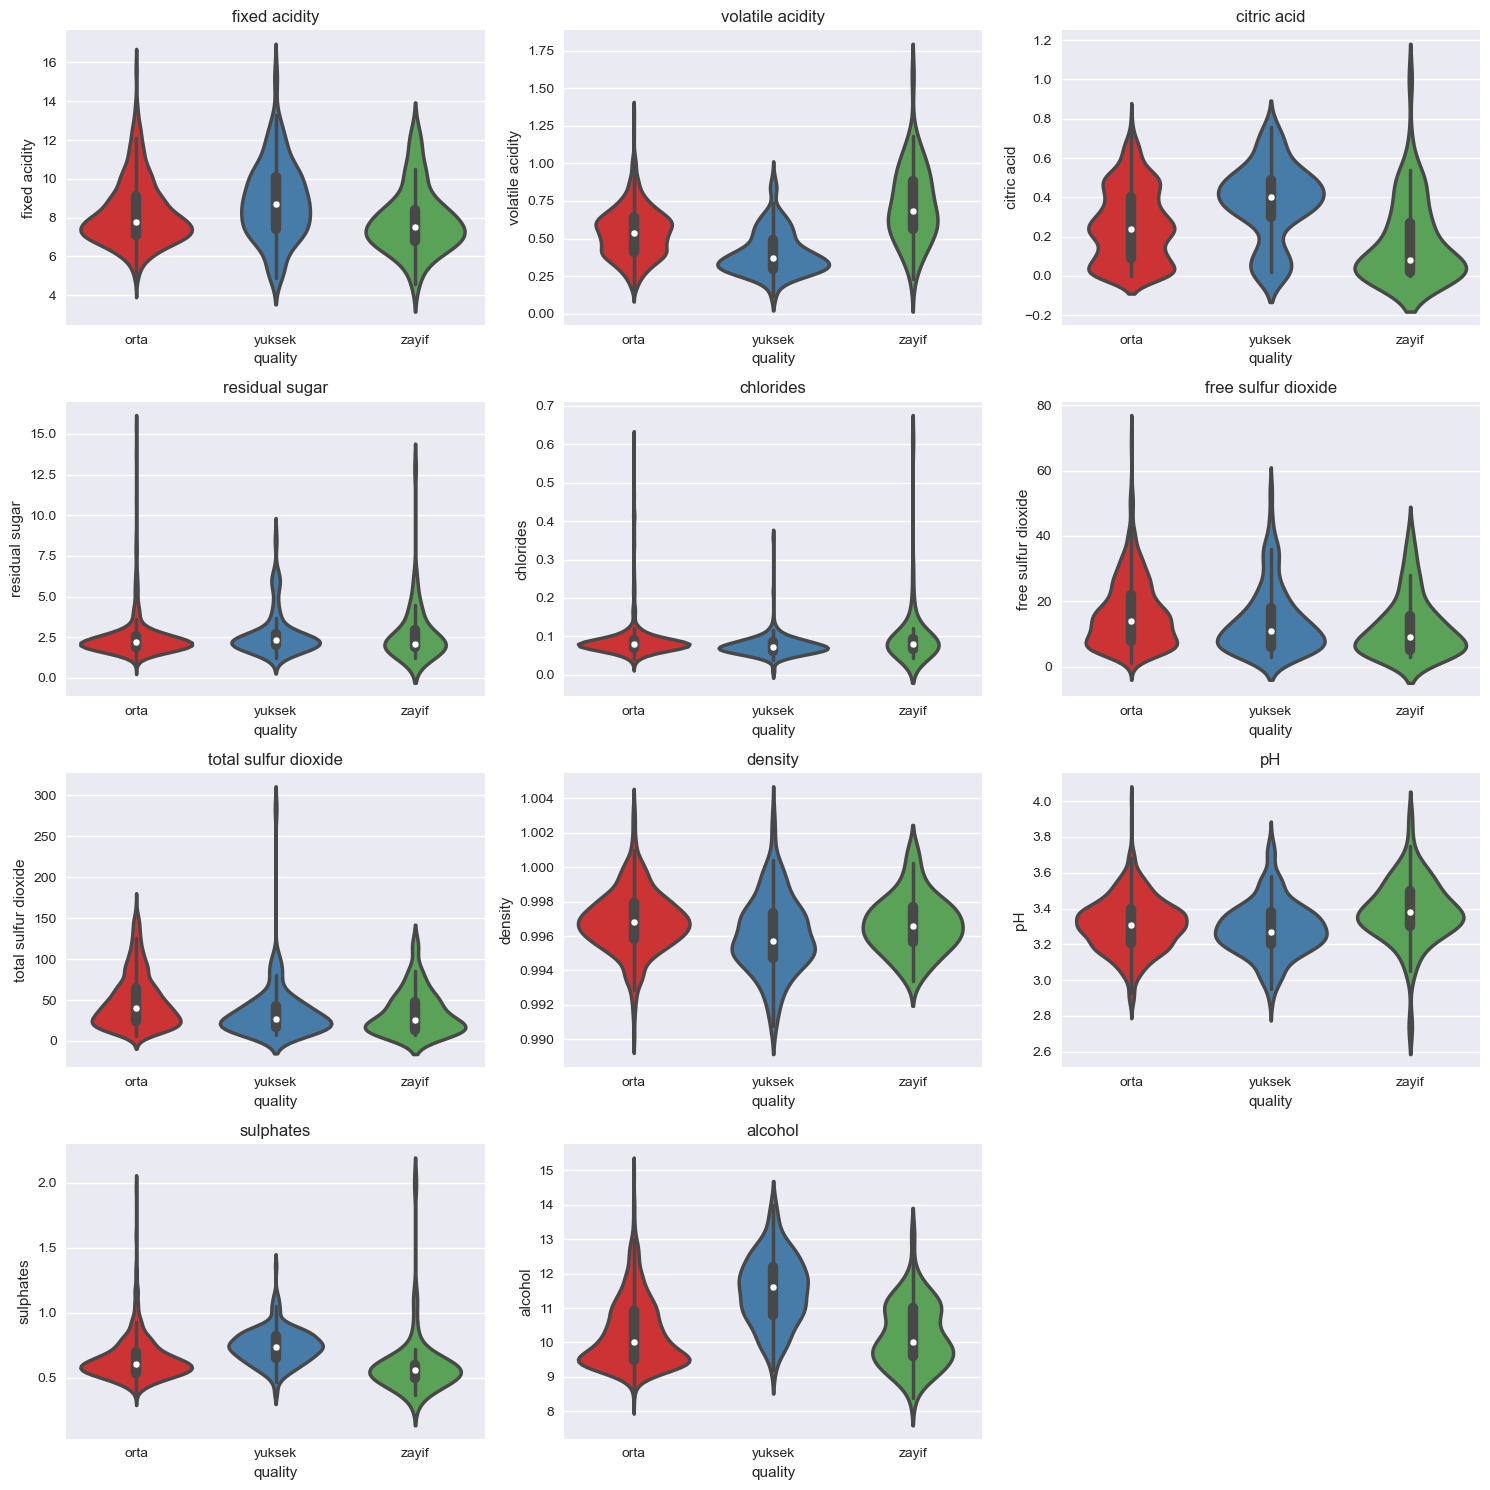

In [5]:
plt.style.use('seaborn')
fig = plt.figure(figsize=(15,15))
for index,column in enumerate(list(df.columns[:-1])):
    plt.subplot(4,3,index+1)
    sns.violinplot(y = df.loc[:, column], x = df['quality'], linewidth=2.5, palette = 'Set1')
    plt.title(column, size = 12)
fig.tight_layout()

### Aykırı Gözlemlerin Giderilmesi
+ Silmek: %5'in altındaysa silinebilir, öteki türlü veri kaybına neden olabilir.
+ Ortalama ile doldurmak: İlgili sütunun ortalamasına eşitlemek. Ortalama aykırı değerlerden etkilendiği için ortalamaya eşitleme durumunda dağılım çift tepeli bir hal alabilir bu da bizim istemediğimiz bir şey.
+ Medyan ile doldurmak: Medyan aykırı değerlerden etkilenmeyen betimsel bir istatistik olduğu için ufak veri setlerindeki aykırıkları gidermek için uygun olabilir.
+ Baskılamak: Alt veya üst sınıra eşitlemek

### Chlorides (Tuz Miktarı)

<Axes: title={'center': 'Aykırı Gözlemsiz'}, ylabel='Density'>

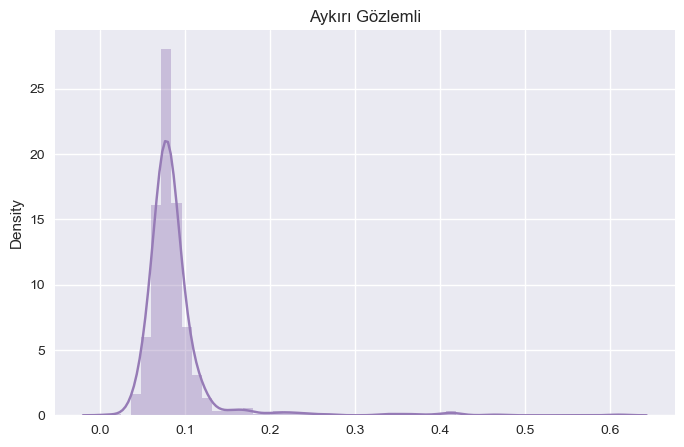

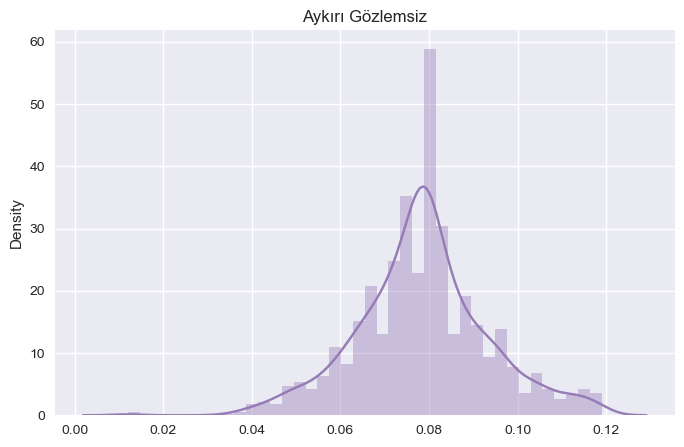

In [6]:
# değişkeni ayrı incelemek için veriden çekelim
df_chlorides = df['chlorides']

# değişkenin temizlikten önceki dağılımı
plt.figure(figsize=(8,5))
plt.title('Aykırı Gözlemli')
sns.distplot(x = df_chlorides, color = '#967bb6')

# eşik değer belirleme
Q1 = df_chlorides.quantile(0.25)
Q3 = df_chlorides.quantile(0.75)

# çeyrekler açıklığı
IQR = Q3 - Q1

alt_sinir = Q1 - 1.5 * IQR
ust_sinir = Q3 + 1.5 * IQR

# aykırı değerleri yakalamak
ust_aykiri = (df_chlorides > ust_sinir)

# ortalama ve medyan değerlerinin belirlenmesi
ort = df_chlorides.mean()
medyan = df_chlorides.median()

# medyan değerine uygunluğundan dolayı
# aykırı değerlerin medyana atanması
df_chlorides[ust_aykiri] = medyan

# temizlenmiş verinin orijinal veriye eşitlenmesi
df['chlorides'] = df_chlorides 

# aykırı değerlerden arındırılmış verinin dağılımı
plt.figure(figsize=(8,5))
plt.title('Aykırı Gözlemsiz')
sns.distplot(x = df_chlorides, color = '#967bb6')

### Eksik Gözlem Analizi
Eksik gözlem, verideki eksik değerlere denir.

Eksik gözlemler,
+ Verilerin dağılımını ve betimsel istatistiklerini etkilerler.
+ Makine öğrenmesi modellerinin sonuçlarına olumsuz yönde etki edebilirler.
+ İstatistiksel testlerin gücünü azaltabilirler.

#### Neden Oluşurlar?
Aşağıdaki hatalardan dolayı veride eksik gözlemler oluşabilir.
+ Veri girişi hataları
+ Ölçüm hataları
+ Veri işleme hataları
+ Örnekleme hataları

Bunların dışında verideki eksik gözlem gerçekten de eksik kalmış bir gözlem olabilir. Yani doğal olarak eksik olması durumu. Mesela anket verilerinde bazı sorulara cevap vermeyen katılımcılar olabilir. Bu durumda bu soruların değerleri eksik kalacaktır.

### Eksik Gözlemlerin Giderilmesi
+ Silmek: Eksik gözlemin rastgele oluştuğu durumlarda kullanılabilir, öteki türlü veride yanlılığa sebebiyet verebilir.
    - Bir gözlem biriminin %50-60'ında eksiklik varsa onu tümden silmek iyi olabilir.
+ Doldurmak: Eksik gözlemler birçok çok farklı şekilde doldurabilir:
    - Betimsel istatistikler: Ortalama, medyan veya mod gibi betimsel istatistikler ile doldurmak.
    - KNN ile doldurmak: KKN algortiması, eksik gözlemi olan satırın en yakın komşularının değerlerini kullanarak eksik gözlemi tahmin eder.
    - Bir alt veya bir üst satırdaki veri ile dorldurma. 

### Eksik Gözlemlere Ulaşmak

In [7]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
# toplam eksik değer sayısı
df.isnull().sum().sum()

0

**Şanslıyız ki bizim veri setimizde eksik gözlem yok.**

### Temizlenmiş Veriyi Kaydet

In [9]:
df.to_csv('redwine-clean.csv')